In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# guarda en variables los datasets y su fuente
futbol = pd.read_csv('data/male_players.csv')

C:\Users\aprai\AppData\Local\Temp\ipykernel_11588\367689262.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  futbol = pd.read_csv('data/male_players.csv')


In [3]:
futbol.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [7]:
futbol_1 = futbol[['player_id', 
 'player_url',
 'fifa_version',
 'fifa_update', 'update_as_of',
 'short_name',  'long_name', 
 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 'dob',  
 'height_cm', 'weight_kg', 'club_team_id',
 'club_name',
 'league_id',
 'league_name', 'league_level', 'club_position',
 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number', 
 'preferred_foot', 'weak_foot', 'skill_moves',
 'international_reputation',
 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 'player_tags', 'player_traits', 
 'pace', 
 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

<Axes: >

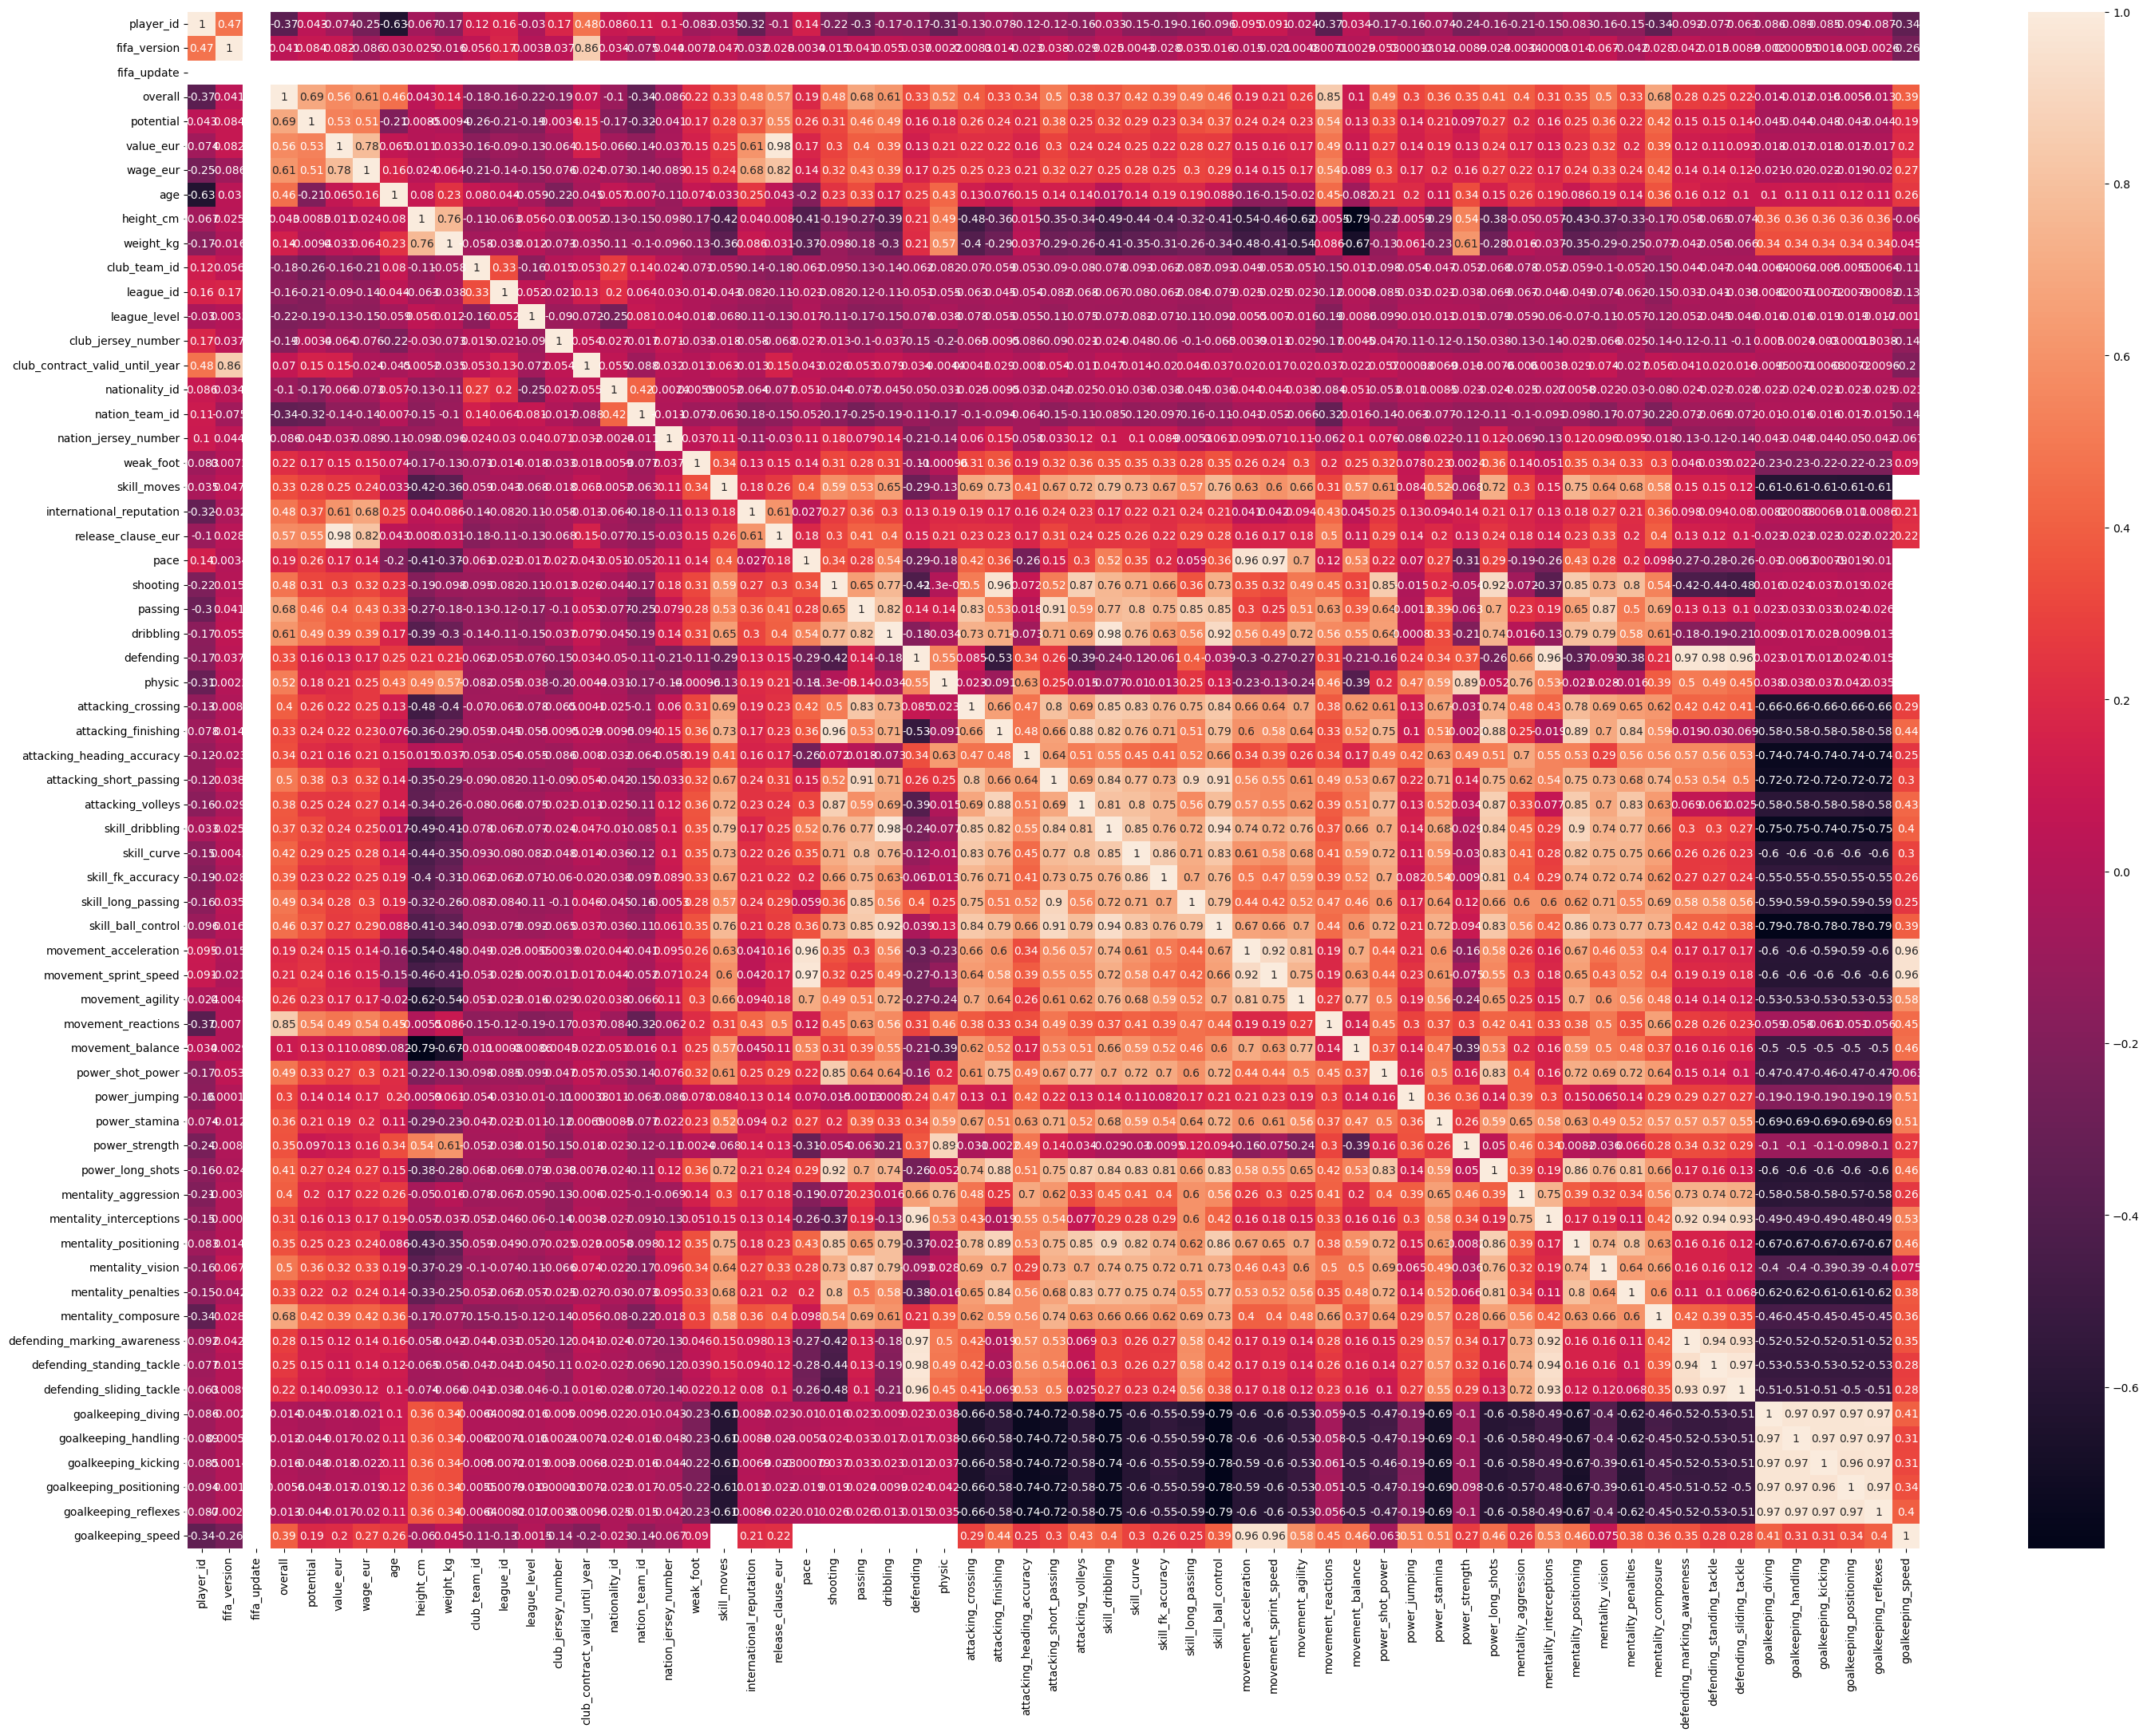

In [10]:
plt.figure(figsize=(35,25))
sns.heatmap(futbol_1.corr(numeric_only=True), annot=True)

Eliminamos los valores objeto

In [11]:
# Eliminar columnas de tipo object
df_numerico = futbol_1.select_dtypes(exclude=['object'])

print(df_numerico)

        player_id  fifa_version  fifa_update  overall  potential    value_eur  \
0          231747          24.0          2.0       91         94  181500000.0   
1          239085          24.0          2.0       91         94  185000000.0   
2          192985          24.0          2.0       91         91  103000000.0   
3          158023          24.0          2.0       90         90   41000000.0   
4          165153          24.0          2.0       90         90   51000000.0   
...           ...           ...          ...      ...        ...          ...   
180016     220806          15.0          2.0       41         61      20000.0   
180017     225509          15.0          2.0       41         50      30000.0   
180018     217591          15.0          2.0       40         50      15000.0   
180019     222947          15.0          2.0       40         49      15000.0   
180020     201197          15.0          2.0       40         40          NaN   

        wage_eur  age  heig

In [12]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 63 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   player_id                       180021 non-null  int64  
 1   fifa_version                    180021 non-null  float64
 2   fifa_update                     180021 non-null  float64
 3   overall                         180021 non-null  int64  
 4   potential                       180021 non-null  int64  
 5   value_eur                       177868 non-null  float64
 6   wage_eur                        178173 non-null  float64
 7   age                             180021 non-null  int64  
 8   height_cm                       180021 non-null  int64  
 9   weight_kg                       180021 non-null  int64  
 10  club_team_id                    178156 non-null  float64
 11  league_id                       178156 non-null  float64
 12  league_level    

In [14]:
df_filled = df_numerico.fillna(df_numerico.median(numeric_only=True))
print(df_filled)


        player_id  fifa_version  fifa_update  overall  potential    value_eur  \
0          231747          24.0          2.0       91         94  181500000.0   
1          239085          24.0          2.0       91         94  185000000.0   
2          192985          24.0          2.0       91         91  103000000.0   
3          158023          24.0          2.0       90         90   41000000.0   
4          165153          24.0          2.0       90         90   51000000.0   
...           ...           ...          ...      ...        ...          ...   
180016     220806          15.0          2.0       41         61      20000.0   
180017     225509          15.0          2.0       41         50      30000.0   
180018     217591          15.0          2.0       40         50      15000.0   
180019     222947          15.0          2.0       40         49      15000.0   
180020     201197          15.0          2.0       40         40     750000.0   

        wage_eur  age  heig

In [15]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 63 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   player_id                       180021 non-null  int64  
 1   fifa_version                    180021 non-null  float64
 2   fifa_update                     180021 non-null  float64
 3   overall                         180021 non-null  int64  
 4   potential                       180021 non-null  int64  
 5   value_eur                       180021 non-null  float64
 6   wage_eur                        180021 non-null  float64
 7   age                             180021 non-null  int64  
 8   height_cm                       180021 non-null  int64  
 9   weight_kg                       180021 non-null  int64  
 10  club_team_id                    180021 non-null  float64
 11  league_id                       180021 non-null  float64
 12  league_level    

<Axes: >

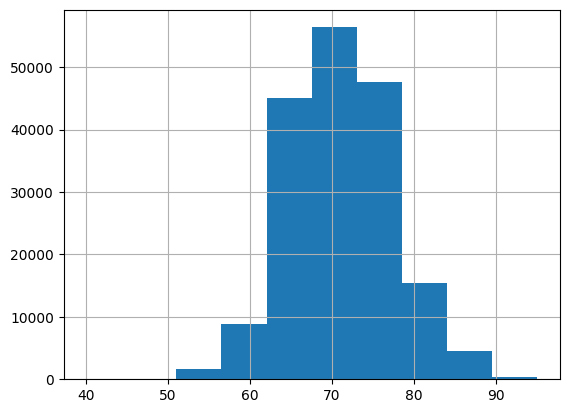

In [19]:
df_filled['potential'].hist()

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)
df_scaled

array([[ 0.40948638,  1.54249614,  0.        , ..., -0.31023834,
        -0.59069768,  0.03915977],
       [ 0.61785964,  1.54249614,  0.        , ..., -0.31023834,
        -0.53505294,  0.03915977],
       [-0.69121738,  1.54249614,  0.        , ..., -0.36902955,
        -0.20118451,  0.03915977],
       ...,
       [ 0.00750603, -1.62806589,  0.        , ..., -0.36902955,
        -0.42376346,  0.03915977],
       [ 0.15959749, -1.62806589,  0.        , ..., -0.31023834,
        -0.42376346,  0.03915977],
       [-0.45802561, -1.62806589,  0.        , ..., -0.48661197,
        -0.20118451,  0.03915977]])

In [21]:
df_scaled.shape

(180021, 63)

In [22]:
pca = PCA(n_components=63)
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[ 1.59075751e+01, -2.01823810e+00,  2.23238676e+01, ...,
         2.74971857e-03, -3.05238296e-02,  5.10213489e-16],
       [ 1.38042356e+01,  1.20575535e+00,  2.44799201e+01, ...,
        -2.07740595e-02, -3.59694689e-02,  1.84626137e-14],
       [ 1.47096574e+01,  1.02820137e+00,  1.89284114e+01, ...,
        -3.80728636e-02,  2.13651851e-03,  2.39587385e-14],
       ...,
       [-5.35780768e+00,  2.94750670e+00, -4.43349504e+00, ...,
         1.57047039e-02,  3.28611773e-02,  2.86701651e-14],
       [-6.22489992e+00,  2.58657495e-01, -5.87969054e+00, ...,
        -1.36633064e-02,  4.52319259e-02,  2.19057770e-14],
       [-5.03462231e+00, -1.56822969e+00, -4.34475578e+00, ...,
        -2.14597417e-02,  5.41715698e-02, -1.49296582e-14]])

In [23]:
len(X_pca[0])

63

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.33825509, 0.45892812, 0.56396707, 0.61331564, 0.65317772,
       0.68818198, 0.71791889, 0.74326803, 0.76369635, 0.78082855,
       0.79728075, 0.81328287, 0.82767654, 0.84130989, 0.85492457,
       0.86701872, 0.87767945, 0.88775286, 0.89629697, 0.90461375,
       0.91178216, 0.91833555, 0.92404668, 0.92943803, 0.93440514,
       0.93887029, 0.94319367, 0.9474577 , 0.95153095, 0.95539284,
       0.95914598, 0.96256798, 0.96570025, 0.96877025, 0.97163932,
       0.97413654, 0.97659057, 0.97889303, 0.98098383, 0.98301492,
       0.98484603, 0.9865349 , 0.98798539, 0.98924405, 0.9904383 ,
       0.99159615, 0.9927118 , 0.99375488, 0.99474804, 0.99569521,
       0.99638358, 0.99699517, 0.99757577, 0.99807701, 0.99857026,
       0.99900209, 0.99938541, 0.99973825, 0.99988505, 0.99993946,
       0.99997309, 1.        , 1.        ])

([<matplotlib.axis.XTick at 0x2304bfb1850>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61')])

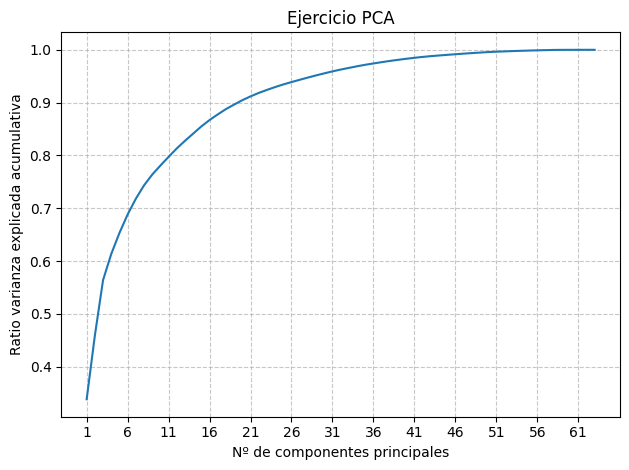

In [36]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,64)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio varianza explicada acumulativa")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,64));
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(np.arange(1, 64, step=5))

In [31]:
pca18 = PCA(n_components=18)
X_pca18 = pca18.fit_transform(df_scaled)

In [33]:
df_pca18 = pd.DataFrame(X_pca18, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
df_pca18

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,15.907575,-2.018238,22.323868,-13.119516,16.818091,-14.284680,-6.421645,17.929871,10.565906,-6.167243,0.038399,1.895888,1.629738,-1.502997,-1.232467,5.476919,3.251942,12.471043
1,13.804236,1.205755,24.479920,-11.778456,19.891264,-15.981282,-6.631094,19.356873,10.451621,-6.444205,-0.311225,1.461761,1.885343,-2.862299,-1.714299,5.800400,4.224207,12.384341
2,14.709657,1.028201,18.928411,-8.639311,9.086124,-7.119186,-6.813892,12.750435,7.551919,-3.022798,-0.841579,-1.280270,1.601943,-0.312106,1.056981,3.524300,0.966421,5.100528
3,11.737685,-4.193808,9.760938,-2.593607,2.235563,-0.222225,-1.153303,5.226322,3.742224,0.468755,-0.728482,-0.718362,1.104956,-0.072036,-0.428296,0.154014,-1.850990,0.268800
4,11.398823,-1.259055,12.109992,-1.277432,5.820292,-3.079027,-1.256061,5.453973,4.183077,-0.696234,-0.061022,0.409940,1.584276,-0.124398,-0.132036,0.674691,-1.274897,-0.494055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,-6.395949,0.692716,-5.681012,1.153209,-0.311087,-3.904111,-1.219628,1.105810,1.804931,-1.047086,-0.072315,0.292826,0.175686,-1.534897,0.783501,0.667773,0.135833,1.508246
180017,-5.268339,-3.259135,-6.348278,1.181646,-1.140129,-3.043298,-1.792796,2.167648,2.872191,-0.200873,0.275182,0.274592,0.973695,-0.313240,0.909290,0.332004,0.327955,1.897619
180018,-5.357808,2.947507,-4.433495,1.997185,-0.257554,-2.874008,-1.423006,1.303776,-0.405560,-0.107094,0.003791,0.224496,0.750684,0.013290,0.940759,1.645794,-0.179351,0.883664
180019,-6.224900,0.258657,-5.879691,1.121604,-0.015214,-2.965804,0.197914,1.291144,2.347219,-0.827716,0.170078,0.177688,1.182971,-1.404989,-0.343235,1.096852,-0.673878,2.185573


In [35]:
df_pca_origin = pd.DataFrame(pca18.components_, columns=df_filled.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
df_pca_origin

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
PC1,-0.029714,0.002035,-2.220446e-16,0.109200,0.081558,0.072241,0.076189,0.028937,-0.099565,-0.080390,...,0.154159,0.097072,0.096729,0.089647,-0.168847,-0.168437,-0.167817,-0.167869,-0.168603,0.035454
PC2,-0.062076,-0.005024,-1.214306e-17,0.066958,0.005663,0.014617,0.030184,0.087785,0.143051,0.140758,...,0.055333,0.288533,0.290414,0.289083,-0.071003,-0.071165,-0.071763,-0.069994,-0.071363,0.015329
PC3,-0.167896,-0.002284,1.665335e-16,0.290017,0.188248,0.226654,0.237606,0.175631,0.127604,0.154612,...,0.121104,-0.054631,-0.063213,-0.071178,0.207101,0.207805,0.206641,0.208812,0.207651,0.014182
PC4,-0.221087,-0.172295,1.665335e-16,-0.054495,-0.199828,-0.186979,-0.111100,0.185508,0.212194,0.248171,...,0.041826,-0.142250,-0.149911,-0.166176,-0.066827,-0.065815,-0.065135,-0.065128,-0.066340,-0.011880
PC5,0.375400,0.395772,-5.551115e-16,0.004475,0.170475,0.208131,0.079878,-0.203154,0.217354,0.165909,...,-0.013685,-0.070062,-0.080191,-0.090680,-0.084929,-0.084276,-0.083703,-0.085902,-0.084865,-0.091107
PC6,0.080606,0.347477,-2.775558e-16,-0.013810,-0.153399,-0.187376,-0.214163,0.225455,-0.068335,-0.048600,...,0.000557,0.059003,0.054928,0.048127,0.043900,0.047499,0.049204,0.046554,0.043633,-0.201271
PC7,0.001958,0.138710,-1.758576e-16,0.096861,-0.102808,-0.112345,-0.120362,0.213693,-0.034616,0.050242,...,0.014540,-0.030980,-0.058311,-0.055103,0.064599,0.062907,0.063453,0.067612,0.064584,0.240979
PC8,-0.107778,-0.143919,9.020562e-17,-0.044727,-0.140500,0.265766,0.253948,0.131042,-0.135124,-0.094020,...,-0.006305,-0.017773,-0.021679,-0.021723,-0.056778,-0.057132,-0.056368,-0.055001,-0.056918,0.003974
PC9,-0.138547,0.219467,2.428613e-16,-0.061079,-0.223610,0.138092,0.068073,0.243639,-0.081828,-0.073860,...,0.050965,-0.001409,-0.020695,-0.022176,-0.013951,-0.012167,-0.014591,-0.009833,-0.012815,0.154675
PC10,-0.044277,0.162381,4.041906e-16,0.050344,0.042465,-0.099337,-0.080247,0.116926,-0.049277,-0.065180,...,0.169213,0.004564,-0.018348,-0.017167,0.022708,0.015163,0.016361,0.026054,0.023695,0.626405
